# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Faturohman Wicaksono
- **Email:** faturrohman727@gmail.com
- **ID Dicoding:** faturohmanw23

## Menentukan Pertanyaan Bisnis

- Apakah workingday dan holiday mempengaruhi jumlah penyewaan sepedah?
- Bagaimana pola penggunaan sepeda dalam satu tahun? Apakah ada musim dengan penggunaan tertinggi?
- Bagaimana kita bisa memprediksi jumlah pengguna sepeda berdasarkan faktor cuaca dan hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### 1. Memasukan dataset

In [2]:
#Membaca file day.csv menjadi dataframe day_df dan menampilkan table
day_df= pd.read_csv('sample_data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Membaca file hour.csv menjadi dataframe hour_df dan menampilkan table
hour_df= pd.read_csv('sample_data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Dataset Characteristic
- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


### Assessing Data

In [4]:
#Melihat sebaran data deskriptif statistik harian
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Tidak terdapat anomali pada data statistik deskriptif day_df.

In [5]:
#Melihat sebaran data deskriptif statistik jam
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Tidak terdapat anomali pada data statistik deskriptif hour_df.

In [6]:
day_df.info()
#Memeriksa tipe data dari tiap kolom yang terdapat dalam day_df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


 - Pada informasi diatas ada 1 tipe data yang kurang tepat berdasarkan kolom 'dteday' yang seharusnya bertipe data 'datetime' dan perlu perbaikan.

In [7]:
day_df.isna().sum()
#Memeriksa apakah terdapat missing value pada day_df.

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


- Pada tabel day_df diatas menunjukan bahwa data tidak terdapat missing values.

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
#Memeriksa duplikasi data pada day_df

Jumlah duplikasi:  0


- Tabel day_df bersifat unik, karena tidak terdapat duplikasi.

In [9]:
hour_df.info()
#Memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Pada informasi diatas ada 1 tipe data yang kurang tepat berdasarkan kolom 'dteday' yang seharusnya bertipe data 'datetime' dan perlu perbaikan.

In [10]:
hour_df.isna().sum()
#Memeriksa apakah terdapat missing value pada hour_df.

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


- Pada tabel hour_df diatas menunjukan bahwa data tidak terdapat missing values.

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
#Memeriksa duplikasi data pada day_df

Jumlah duplikasi:  0


- Tabel hour_df bersifat unik, karena tidak terdapat duplikasi.

### Cleaning Data



1.   Menghapus tabel yang tidak diperlukan

Penghapusan tabel **hour_df** dilakukan karena tidak relevan untuk menjawab pertanyaan yang sudah ditetapkan karena informasi yang ada di tabel **hour_df** sama adanya dengan informasi yang ada di tabel **day_df** perbedaannya hanya di kolom 'hr' selebihnya sama.



In [12]:
del hour_df

2.   Menghapus beberapa kolom yang tidak digunakan
  - Menghapus kolom 'instant' karena pada kolom 'instant' tidak memberikan informasi tambahan yang berguna.
  - Menghapus kolom 'windspeed' karena kolom ini tidak relevan untuk menjawab pertanyaan yang telah ditetapkan.

In [13]:
hapus_kol = ['instant', 'windspeed']

for i in day_df.columns:
  if i in hapus_kol:
    day_df.drop(i, axis=1, inplace=True)
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3.   Mengubah beberapa detail tentang kolom

Untuk memudahkan saya dalam mengolah data yang ada, saya mengubah beberapa detail tentang kolom yang ada.

In [14]:
#Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_cond',
    'cnt' : 'count'}, inplace=True)

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [15]:
#Mapping untuk mengubah value numerik ke value kategorikal
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [16]:
# Mengubah tipe data 'dateday' ke datetime
day_df['date'] = pd.to_datetime(day_df.date)

# Mengubaha tipe data ke kategorikal
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [17]:
#Memeriksa perubahan tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## Exploratory Data Analysis (EDA)

### Explore Data day_df

1.   Pengelompokan penyewa sepedah baik Casual ataupun Registered berdasarkan bulan penyewaan.

In [18]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-18-b05109ea9f0a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

- Dari hasil diatas, kita dapat menyimpulkan bahwa rata-rata terbesar dan jumlah terbanyak terdapat pada bulan Juni. Sedangkan rata-rata terkecil dan penyewaan ter rendah terdapat pada bulan Januari.

2.   Pengelompokan penyewa sepeda Casual dan Registered berdasarkan cuaca(weather_cond).

In [19]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-19-c87e0d584980>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

- Dari hasil diatas, kita dapat menyimpulkan bahwa penyewa sepeda cenderung menyewa pada saat cuaca cerah atau mendung, sangat sedikit pada cuaca salju atau hujan dan tidak terdapat penyewaan pada saat cuaca buruk.

3.  Pengelompokan penyewa sepeda pada saat holiday.

In [20]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-20-6767227fada1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

- Dari hasil diatas, penyewa sepeda cenderung menyewa saat bukan hari libur, seperti hari kerja (workingday).

NB : 0 untuk workingday dan 1 untuk holiday.

4.   Membandingkan penyewa pada saat weekday dengan weekend.

In [21]:
day_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-21-003790dec043>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

- Pada grouping diatas dapat disimpulkan bahwa jumlah rata-rata penyewa sepedah terbanyak terdapat pada hari Jumat yang termasuk workingday dan rata-rata terkecil nya pada hari Minggu. Urutannya adalah sebagai berikut dari jumlah rata-rata terbesar ke terkecil: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

5.   Pengelompokan penyewa Casual dan Registered berdasarkan workingday.

In [22]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

<ipython-input-22-fb984321fedb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

- Dari hasil diatas, dapat disimpulkan bahwa terdapat perbedaan signifikan namun tidak terlalu banyak dan penyewa lebih cenderung menyewa pada saat workingday dibandingkan non workingday dilihat dari rata-rata nya.

NB: 0 untuk non workingday dan 1 untuk workingday

6.   Pengelompokan jumlah penyewa sepeda berdasarkan musim atau season.

In [23]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-23-176def68a8e5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

- Dari hasil diatas, kita dapat menyimpulkan bahwa para penyewa sepeda lebih banyak menyewa sepeda pada saat musim Gugur(Fall) dengan rata-rata tertinggi. Sedangkan untuk musim dengan penyewaan paling sedikit adalah musim Semi(Spring) dengan rata-rata ter-rendah.

7.   Hubungan antara penyewa casual, registered, dan count

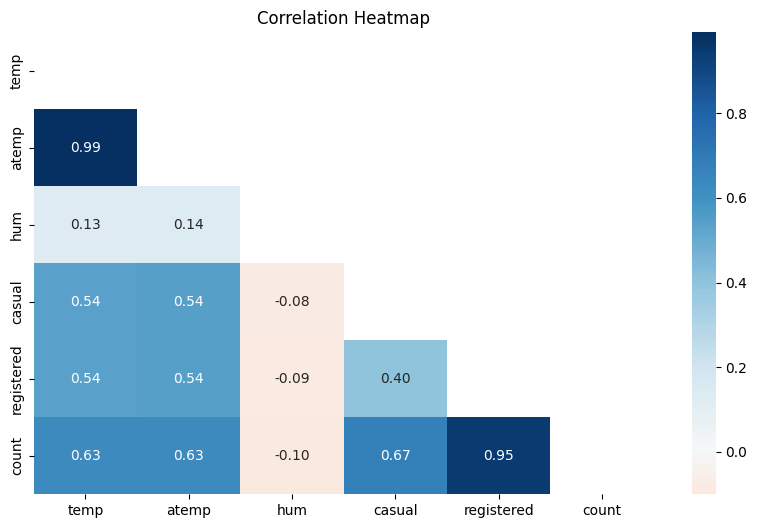

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap='RdBu',
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Hasil analisa yang didapat dari heatmap korelasi diatas yaitu:
  - atemp dan temp sangat berkorelasi (0,99).
  - hum memiliki korelasi yang lemah terhadap atemp dan temp (0,13 dan 0,14).
  - casual memiliki korelasi yang cukup dengan temp dan atemp (0,54) dan sedikit negatif terhadap hum (-0,08).
  - registered memiliki korelasi cukup dengan temp dan atemp (0,54), sedikit negatif dengan hum (-0,09) dan korelasi moderat dengan casual (0,40).
  - count memiliki korelasi cukup kuat dengan temp,atemp,casual dan registered (0,63 , 0,63 , 0,67 , 0,95) dan berkorelasi sedikit negatif dengan hum (-0,10).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah workingday dan holiday mempengaruhi jumlah penyewaan sepedah?

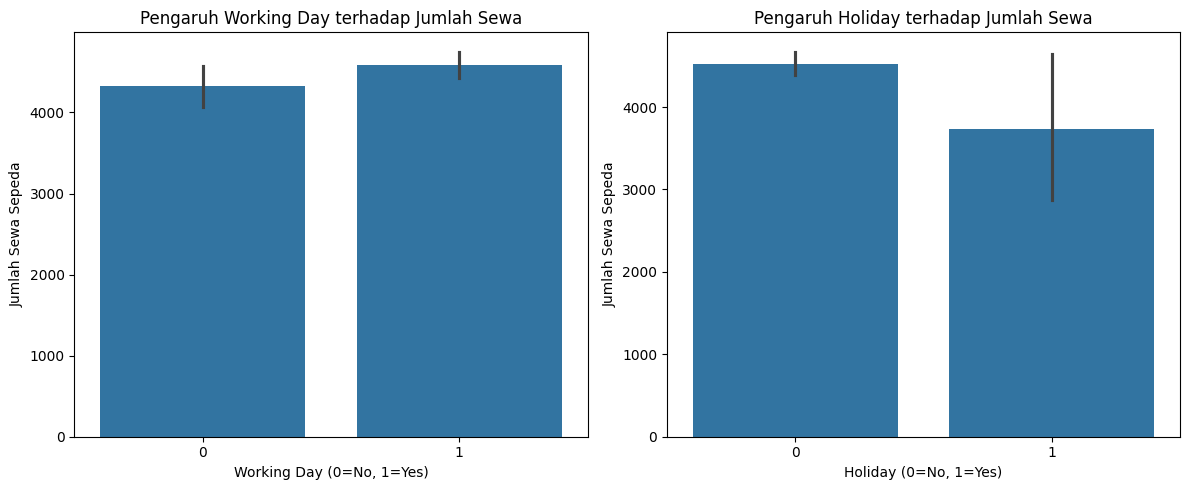

In [25]:
# Membuat figure dengan 2 subplot berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot pertama - Workingday
sns.barplot(x='workingday', y='count', data=day_df, ax=ax1)
ax1.set_title('Pengaruh Working Day terhadap Jumlah Sewa')
ax1.set_xlabel('Working Day (0=No, 1=Yes)')
ax1.set_ylabel('Jumlah Sewa Sepeda')

# Plot kedua - Holiday
sns.barplot(x='holiday', y='count', data=day_df, ax=ax2)
ax2.set_title('Pengaruh Holiday terhadap Jumlah Sewa')
ax2.set_xlabel('Holiday (0=No, 1=Yes)')
ax2.set_ylabel('Jumlah Sewa Sepeda')

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

Berdasarkan visualisasi data menggunakan bar chart diatas, dapat disimpulkan bahwa workingday dan holiday mempengaruhi kuantitas penyewa sepeda dengan pola yang berbeda:

  1. Pada hari kerja (workingday), rata-rata penyewaan mencapai 4584 unit, sedangkan pada hari libur (holiday) menurun menjadi 3735 unit, menunjukkan penurunan sekitar 18.5%.
  2. Terlihat error bar yang lebih panjang pada grafik holiday, mengindikasikan variabilitas yang lebih tinggi dalam jumlah penyewaan pada hari libur dibandingkan hari kerja yang cenderung lebih stabil.
  3. Pola ini kemungkinan disebabkan oleh:
    - Kebiasaan pengguna yang memanfaatkan sepeda sebagai moda transportasi untuk berangkat kerja
    - Rutinitas yang lebih teratur pada hari kerja dibandingkan hari libur
    - Penggunaan sepeda yang lebih berorientasi pada commuting dibanding rekreasi
  4. Implikasi bisnis:
    - Perlu strategi khusus untuk meningkatkan penyewaan di hari libur
    - Dapat mempertimbangkan promosi khusus atau paket wisata bersepeda untuk hari libur
    - Optimalisasi jumlah unit sepeda yang tersedia sesuai dengan pola permintaan

### Pertanyaan 2:  Bagaimana pola penggunaan sepeda dalam satu tahun? Apakah ada musim dengan penggunaan tertinggi?

<ipython-input-28-8bcfafaa0b9b>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = filtered_df.groupby("month")["count"].sum().reset_index()


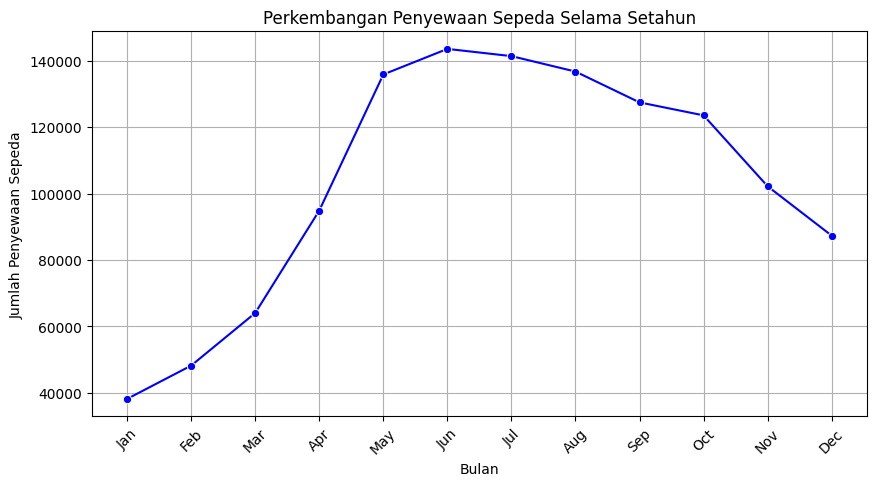

<ipython-input-28-8bcfafaa0b9b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count',data=day_df, palette="coolwarm")


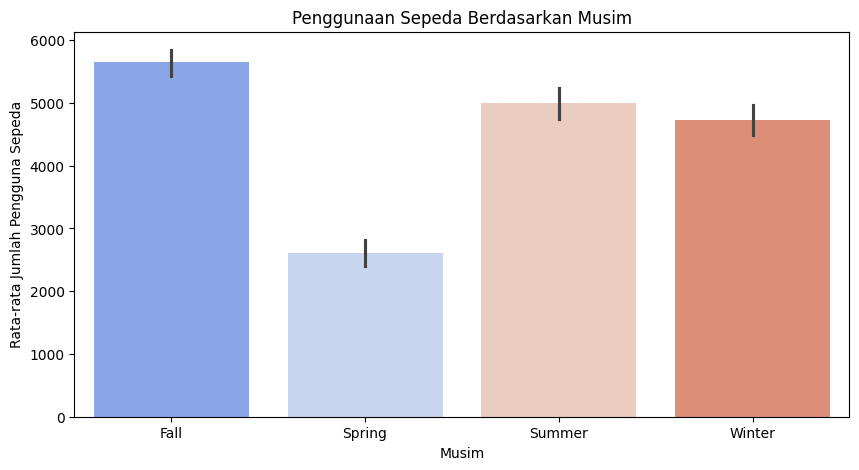

In [28]:
# Visualisasi pola penggunaan sepeda per bulan
day_df['month'] = pd.Categorical(day_df['month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], ordered=True)

# Mengubah 'year' menjadi numerik
day_df['year'] = pd.to_numeric(day_df['year'], errors="coerce")

# Memilih Setahun pertama untuk dianalisis berdasarkan pertanyaan
first_year = day_df["year"].min()
filtered_df = day_df[day_df["year"] == first_year]

# Agregasi jumlah penyewaan sepeda per bulan
monthly_counts = filtered_df.groupby("month")["count"].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_counts, x="month", y="count", marker="o", color="b")
plt.title(f"Perkembangan Penyewaan Sepeda Selama Setahun")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.show()

# Visualisasi penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='count',data=day_df, palette="coolwarm")
plt.title("Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.show()


Berdasarkan visualisasi data diatas hal yang kita dapat yaitu:  

1. Pola penggunaan sepeda dalam satu tahun:  
   - Penggunaan sepeda cenderung meningkat dari **Januari hingga Juni**, mencapai puncaknya pada **Juni dan Juli**.  
   - Setelah Juli, terjadi penurunan bertahap hingga Desember.  
   - Hal ini menunjukkan bahwa penggunaan sepeda lebih tinggi pada pertengahan tahun dibandingkan awal atau akhir tahun.  

2. Musim dengan penggunaan tertinggi:  
   - **Musim Gugur (Fall)** memiliki rata-rata jumlah pengguna sepeda tertinggi.  
   - **Musim Panas (Summer)** juga menunjukkan tingkat penggunaan yang tinggi, tetapi sedikit lebih rendah dari musim gugur.  
   - **Musim Dingin (Winter)** memiliki tingkat penggunaan yang cukup tinggi, sementara **musim semi (Spring)** memiliki jumlah pengguna sepeda terendah.  

Kesimpulannya, penggunaan sepeda mencapai puncaknya di **pertengahan tahun (Juni-Juli)** dan **musim Gugur adalah musim dengan penggunaan tertinggi**.

### Pertanyaan 3 : Bagaimana kita bisa memprediksi jumlah pengguna sepeda berdasarkan faktor cuaca dan workingday?

<ipython-input-38-5894da2154b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_cond', y='count',data=day_df, palette="coolwarm")


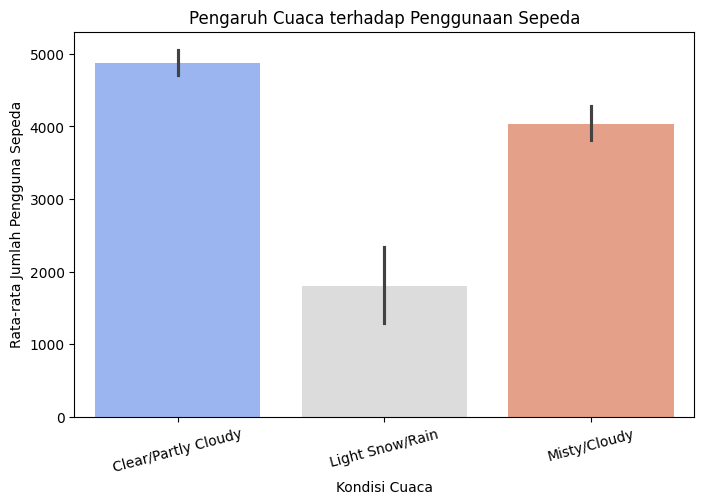

<ipython-input-38-5894da2154b4>:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_day = day_df.pivot_table(values="count", index="weekday", columns="weather_cond", aggfunc="mean")


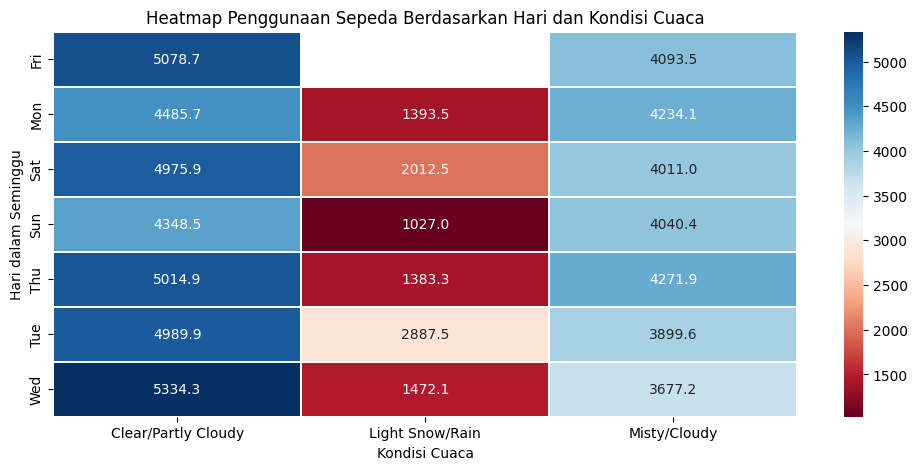

In [38]:
# Visualisasi penggunaan sepeda berdasarkan cuaca
plt.figure(figsize=(8, 5))
sns.barplot(x='weather_cond', y='count',data=day_df, palette="coolwarm")
plt.title("Pengaruh Cuaca terhadap Penggunaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.xticks(rotation=15)
plt.show()

# Heatmap jumlah pengguna berdasarkan hari dan kondisi cuaca
pivot_table_day = day_df.pivot_table(values="count", index="weekday", columns="weather_cond", aggfunc="mean")

plt.figure(figsize=(12, 5))
sns.heatmap(pivot_table_day, cmap="RdBu", annot=True, fmt=".1f", linewidths=0.3)
plt.title("Heatmap Penggunaan Sepeda Berdasarkan Hari dan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Hari dalam Seminggu")
plt.show()

Berdasarkan kedua visualisasi diatas, saya dapat membuat beberapa kesimpulan untuk memprediksi jumlah pengguna sepeda berdasarkan faktor cuaca dan workingday:

1. Pengaruh Cuaca:
- Cuaca Clear/Partly Cloudy memiliki jumlah pengguna sepeda tertinggi (sekitar 5000 pengguna)
- Cuaca Light Snow/Rain memiliki jumlah pengguna terendah (sekitar 2000 pengguna)
- Cuaca Misty/Cloudy memiliki jumlah pengguna menengah (sekitar 4000 pengguna)

2. Kombinasi dengan Workingday (dari heatmap):
- Pada hari kerja (workingday), penggunaan sepeda cenderung tinggi di semua kondisi cuaca
- Penggunaan tertinggi terjadi pada hari kerja dengan cuaca Clear/Partly Cloudy
- Penggunaan terendah terjadi saat Light Snow/Rain, terlepas dari workingday atau tidak

Jadi untuk memprediksi jumlah pengguna:
- Prediksi akan tinggi jika: hari kerja dan cuaca cerah
- Prediksi akan rendah jika: cuaca hujan/salju ringan, terlepas dari hari kerja atau tidak
- Prediksi akan moderat jika: cuaca berkabut/berawan

Pola ini dapat digunakan sebagai dasar untuk membuat prediksi kasar jumlah pengguna sepeda berdasarkan kombinasi kedua faktor tersebut.

## Analisis Lanjutan (Opsional)

### Klustering seberapa berat penggunaan sepedah seseorang.

In [31]:
# Menentukan batas bin berdasarkan kuantil
q1 = day_df["count"].quantile(0.25)  # Kuartil 1 (Q1)
q3 = day_df["count"].quantile(0.75)  # Kuartil 3 (Q3)

# Fungsi untuk melakukan binning berdasarkan Q1 dan Q3
def categorize_usage(cnt):
    if cnt <= q1:
        return "Low Usage"
    elif cnt <= q3:
        return "Medium Usage"
    else:
        return "High Usage"

# Terapkan binning ke dataset
day_df["usage_category"] = day_df["count"].apply(categorize_usage)

# Cek distribusi kategori
day_df["usage_category"].value_counts()


,count
usage_category,
Medium Usage,365
Low Usage,183
High Usage,183


## Conclusion

- **Conclution pertanyaan 1 :**Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan holiday.
 - Berdasarkan analisis, jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur. Hal ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan kerja. Pada hari libur, meskipun jumlah penyewaan menurun, variabilitasnya lebih tinggi. Strategi bisnis dapat difokuskan pada promosi khusus di hari libur untuk meningkatkan penggunaan sepeda.
- **Conclution pertanyaan 2 :**Musim Gugur (Fall) memiliki penggunaan sepeda tertinggi, sedangkan musim Dingin (Winter) terendah.
  - Penggunaan sepeda meningkat dari Januari hingga puncaknya pada Juni-Juli, kemudian menurun hingga akhir tahun. Penggunaan tertinggi terjadi di musim panas, sedangkan terendah di musim dingin. Strategi bisnis dapat fokus pada promosi selama musim panas dan penawaran khusus di musim dingin untuk mendorong penggunaan.
- **Conclution pertanyaan 3 :**Penggunaan sepeda tertinggi terjadi saat cuaca cerah dan pada hari kerja.
  - Berdasarkan analisis, penggunaan sepeda tertinggi terjadi saat cuaca cerah dan pada hari kerja. Cuaca cerah/berawan ringan meningkatkan jumlah pengguna, sementara hujan/salju ringan menurunkan penggunaan. Pada hari kerja, penggunaan lebih tinggi terlepas dari kondisi cuaca. Untuk memprediksi jumlah pengguna, fokuslah pada kombinasi hari kerja dan cuaca cerah untuk memaksimalkan prediksi penggunaan
- **Saran :**
  - Gunakan model prediktif berbasis cuaca untuk menyesuaikan ketersediaan sepeda di stasiun.
  - Sediakan informasi cuaca kepada pengguna secara real-time untuk membantu perencanaan perjalanan.
  - Promosikan penggunaan sepeda saat cuaca ideal (sejuk, berawan ringan) untuk meningkatkan demand.